# Mumbai model

In [457]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV

In [458]:
df = pd.read_csv("Mumbai1.csv")
df.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


# Display Columns

In [459]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff',
       '24x7 Security', 'Children's Play Area', 'Clubhouse', 'Intercom',
       'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
       'Swimming Pool'],
      dtype='object')

We can remove the new/resale column as it wont be very helpfull in our case

In [460]:
# Removing unnecessary columns 
df_1 = df.drop(['New/Resale', 'Gymnasium', 'Clubhouse', 'Landscaped Gardens', 'Swimming Pool', 'Indoor Games', 'Jogging Track'], axis='columns')
# df_1 = df.drop(['New/Resale'], axis='columns')
df_1.head()

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Intercom,Gas Connection
0,4850000,720,Kharghar,1,1,1,1,1,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,1,1,0
3,4500000,650,Kharghar,1,1,1,1,1,0,1,0
4,5000000,665,Kharghar,1,1,1,1,1,0,1,0


# Checking Null values in df_1 

In [461]:
df_1.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Intercom                0
Gas Connection          0
dtype: int64

Good! no null values..

# Exploratory analysis and Feature Engineering

Before building our model, let us explore the 'Number of Bedrooms' and 'Location' Column in our Dataset. There can be a lot of improvement in the way our model reads this data.

## Number of Bedrooms

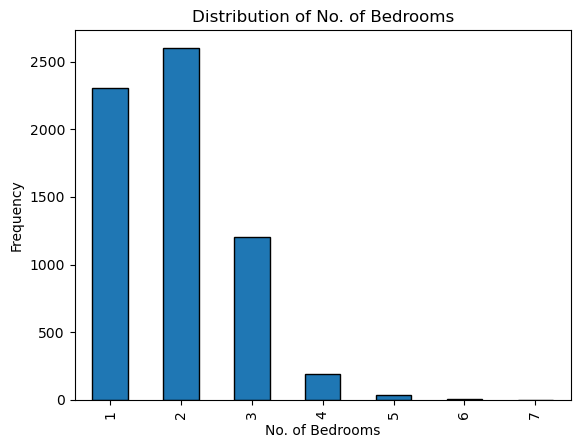

In [462]:
# No of bedrooms Analysis

unique_bedrooms = df['No. of Bedrooms'].unique()
df_1['No. of Bedrooms'].value_counts().loc[unique_bedrooms].sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of No. of Bedrooms')
plt.show()

In [463]:
df_1['No. of Bedrooms'].value_counts()

No. of Bedrooms
2    2601
1    2307
3    1201
4     190
5      39
6       7
7       2
Name: count, dtype: int64

As is the typical case, mostly all the apartments in the dataset have 1, 2 and 3 bedrooms mostly (replicating the real life). 4 Bedroom apartments and more are not common in India.Since the Count of 4 bedrooms and more is very low, let's group them all together as '4-7' and change the type from numeric to string.

In [464]:
# Grouping 4 - 7 bedrooms together as they are very few in numbers
df_1['No. of Bedrooms'] = df_1['No. of Bedrooms'].replace({4: '4-7', 5: '4-7', 6: '4-7', 7: '4-7'})
df_1['No. of Bedrooms'].value_counts()

No. of Bedrooms
2      2601
1      2307
3      1201
4-7     238
Name: count, dtype: int64

In [465]:
# Convert type of 'No. of Bedrooms' to String
df_1['No. of Bedrooms'] = df_1['No. of Bedrooms'].astype(str)

In [466]:
df_1.head()

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Intercom,Gas Connection
0,4850000,720,Kharghar,1,1,1,1,1,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,1,1,0
3,4500000,650,Kharghar,1,1,1,1,1,0,1,0
4,5000000,665,Kharghar,1,1,1,1,1,0,1,0


# Location

In [467]:
df_1.Location.value_counts()

Location
Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: count, Length: 413, dtype: int64

In [468]:
# Apply Lambda strip
df_1.Location.apply(lambda x : x.strip())
location_counts = df_1.Location.value_counts()
location_counts

Location
Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: count, Length: 413, dtype: int64

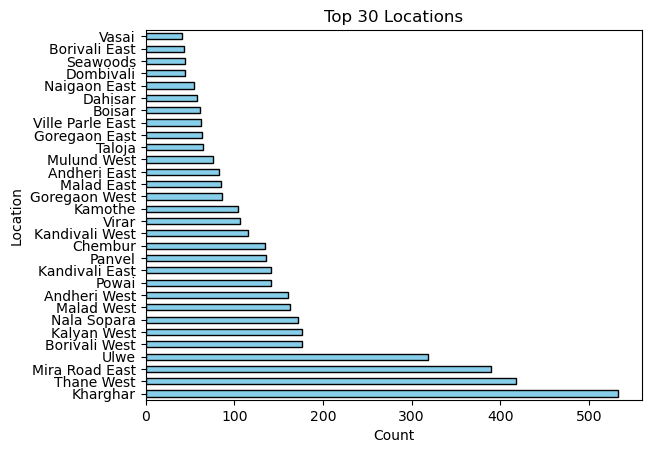

In [469]:
# Displaying the top_n locations by count
top_n = 30
location_counts.head(top_n).plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title(f'Top {top_n} Locations')
plt.show()

By analysing locations_count, we can see that there are 413 distinct locations. Let us implement Dimensionalty Reduction on the Locations column by grouping evry Location with 10 houses or less as 'Others'

In [470]:
# if Any location has 10 entries or less, categorize it as others in the Location column

locations_to_group = location_counts[location_counts <= 10].index
df_1['Location'] = df_1['Location'].replace(locations_to_group, 'Others')
updated_location_counts = df_1['Location'].value_counts()
updated_location_counts

Location
Others            808
Kharghar          533
Thane West        418
Mira Road East    390
Ulwe              319
                 ... 
Vashi              12
matunga east       12
Kalyan East        11
Palghar            11
Kurla West         11
Name: count, Length: 90, dtype: int64

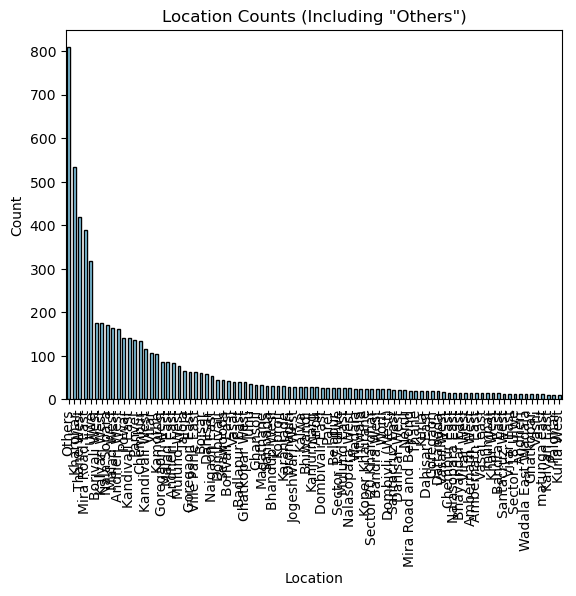

In [471]:
updated_location_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Counts (Including "Others")')
plt.show()

Now lets check for and remove any outliers in the 'Others' based on 'Price' and 'Area'

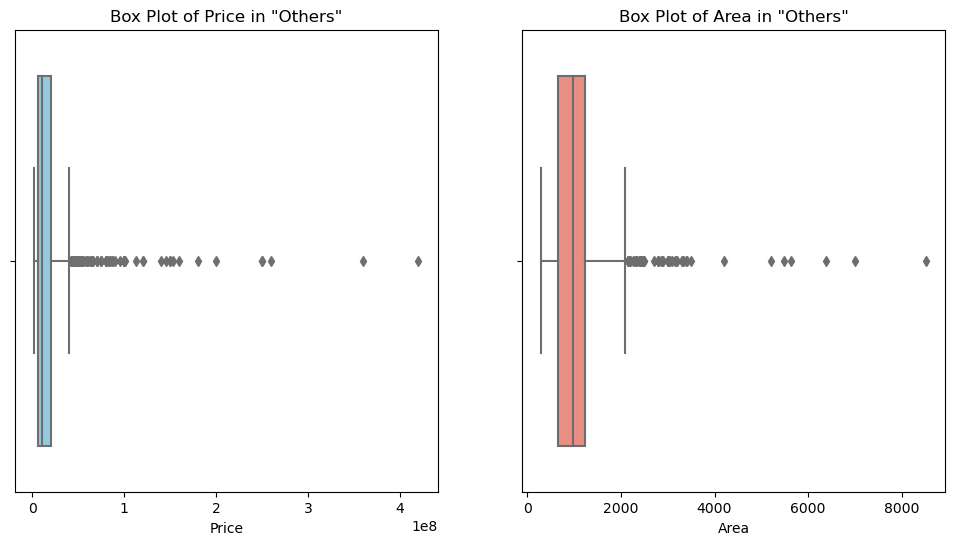

In [472]:
# check for outliers

others_rows = df_1['Location'] == 'Others'
others_data = df_1.loc[others_rows, ['Price', 'Area']]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Price', data=others_data, color='skyblue')
plt.title('Box Plot of Price in "Others"')

plt.subplot(1, 2, 2)
sns.boxplot(x='Area', data=others_data, color='salmon')
plt.title('Box Plot of Area in "Others"')

plt.show()

In [473]:
# Calculate IQR for Price and Area in the 'Others' category

Q1 = others_data.quantile(0.25)
Q3 = others_data.quantile(0.75)
IQR = Q3 - Q1
IQR

Price    14129500.00
Area          592.75
dtype: float64

In [474]:
# Define a threshold for identifying outliers
outlier_threshold = 1.5

# Identify potential outliers
outliers_price = (others_data['Price'] < (Q1['Price'] - outlier_threshold * IQR['Price'])) | (others_data['Price'] > (Q3['Price'] + outlier_threshold * IQR['Price']))
outliers_area = (others_data['Area'] < (Q1['Area'] - outlier_threshold * IQR['Area'])) | (others_data['Area'] > (Q3['Area'] + outlier_threshold * IQR['Area']))

# Display potential outliers
potential_outliers = others_data[outliers_price | outliers_area]
print("Potential Outliers:")
print(potential_outliers)

Potential Outliers:
          Price  Area
187    65000000  1200
188    45000000  1717
265    42000000  1200
268   101400000  2880
273    50100000  2800
...         ...   ...
4378   58000000  1735
5213   51500000  1170
5397   51500000  1170
6036  120000000  3000
6218   47500000  1650

[98 rows x 2 columns]


In [475]:
df_1.shape

(6347, 11)

In [476]:
# Create a mask for rows containing outliers
outliers_mask = outliers_price | outliers_area

# Remove potential outliers from the original DataFrame
df_1 = df_1[~(others_rows & outliers_mask)]
df_1.shape

(6249, 11)

In [477]:
# No of outliers removed from other location
print(outliers_mask.sum()) 

98


In [478]:
df_1.head()

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Intercom,Gas Connection
0,4850000,720,Kharghar,1,1,1,1,1,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,1,1,0
3,4500000,650,Kharghar,1,1,1,1,1,0,1,0
4,5000000,665,Kharghar,1,1,1,1,1,0,1,0


After removing the outliers, let us create a new coulmn 'Price per sq feet' which will help in the model being more accurate.

# Price per sq feet

In [479]:
# Create a new column for "Price per Square Feet"
df_1['Price_per_sqft'] = df_1['Price'] / df_1['Area']
df_1.head()

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Intercom,Gas Connection,Price_per_sqft
0,4850000,720,Kharghar,1,1,1,1,1,0,0,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,1,0,0,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,1,1,0,10307.692308
3,4500000,650,Kharghar,1,1,1,1,1,0,1,0,6923.076923
4,5000000,665,Kharghar,1,1,1,1,1,0,1,0,7518.796992


After feature engineering, let us encode the categorival datas - 'No. of Bedrooms' and 'Location'

# One hot encoding 'No. of Bedrooms' and 'Location'

In [480]:
df_2 = pd.get_dummies(df_1, columns=['No. of Bedrooms', 'Location'], prefix=['Bedrooms', 'Location'])
df_2.head()

,Price,Area,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Intercom,Gas Connection,Price_per_sqft,...,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_Worli,Location_matunga east,Location_mumbai
0,4850000,720,1,1,1,1,0,0,0,6736.111111,...,False,False,False,False,False,False,False,False,False,False
1,4500000,600,1,1,1,1,0,0,0,7500.000000,...,False,False,False,False,False,False,False,False,False,False
2,6700000,650,1,1,1,1,1,1,0,10307.692308,...,False,False,False,False,False,False,False,False,False,False
3,4500000,650,1,1,1,1,0,1,0,6923.076923,...,False,False,False,False,False,False,False,False,False,False
4,5000000,665,1,1,1,1,0,1,0,7518.796992,...,False,False,False,False,False,False,False,False,False,False


# Split dataset to X and y

In [481]:
X = df_2.drop(['Price'],axis = 'columns')
X.head()

,Area,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Intercom,Gas Connection,Price_per_sqft,Bedrooms_1,...,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_Worli,Location_matunga east,Location_mumbai
0,720,1,1,1,1,0,0,0,6736.111111,True,...,False,False,False,False,False,False,False,False,False,False
1,600,1,1,1,1,0,0,0,7500.000000,True,...,False,False,False,False,False,False,False,False,False,False
2,650,1,1,1,1,1,1,0,10307.692308,True,...,False,False,False,False,False,False,False,False,False,False
3,650,1,1,1,1,0,1,0,6923.076923,True,...,False,False,False,False,False,False,False,False,False,False
4,665,1,1,1,1,0,1,0,7518.796992,True,...,False,False,False,False,False,False,False,False,False,False


In [482]:
y = df_2.Price
y.head()

0    4850000
1    4500000
2    6700000
3    4500000
4    5000000
Name: Price, dtype: int64

# Train Test split

In [483]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Simple Linear Regression Model

In [484]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## 1. SLR Cross Validation

In [485]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr_cross_val_scores = cross_val_score(lr_model, X_train, y_train, scoring='r2', cv=kf)
print('Simple Linear Regression Cross-Validation R2 Scores:', lr_cross_val_scores)
print('Mean R2 Score:', np.mean(lr_cross_val_scores))

Simple Linear Regression Cross-Validation R2 Scores: [0.8683327  0.90833978 0.91188948 0.82211684 0.8910911 ]
Mean R2 Score: 0.8803539786277345


## 2. Overfitting check

In [486]:
y_pred_lin_val = lr_model.predict(X_val)
r2_lin_val = r2_score(y_val, y_pred_lin_val)
print('\nSimple Linear Regression Metrics on Validation Set:')
print(f'R-squared (R2): {r2_lin_val}')


Simple Linear Regression Metrics on Validation Set:
R-squared (R2): 0.9287779550863169


## 3. SLR Metrics

In [487]:
y_pred_lin = lr_model.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression Mean Squared Error (MSE): {mse_lin}')
print(f'Linear Regression Mean Absolute Error: {mae_lin}')
print(f'Linear Regression R-squared (R2): {r2_lin}')

Linear Regression Mean Squared Error (MSE): 24271622469697.39
Linear Regression Mean Absolute Error: 2621646.428
Linear Regression R-squared (R2): 0.9082363732799628


# Random Forest model

In [488]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

## 1. RF Cross Validation

In [489]:
rf_cross_val_scores = cross_val_score(rf_model, X, y, scoring='r2', cv=kf)
print(f'Random Forest Cross-Validation R2 Scores: {rf_cross_val_scores}')
print(f'Mean R2 Score: {np.mean(rf_cross_val_scores)}')

Random Forest Cross-Validation R2 Scores: [0.97614966 0.99035171 0.86251849 0.96287556 0.99553561]
Mean R2 Score: 0.9574862062357099


## 2. RF Overfitting check

In [490]:
y_pred_rf_val = rf_model.predict(X_val)
r2_rf_val = r2_score(y_val, y_pred_rf_val)
print('\nRandom Forest Metrics on Validation Set:')
print(f'R-squared (R2): {r2_rf_val}')



Random Forest Metrics on Validation Set:
R-squared (R2): 0.9839561021437608


## 3. RF Metrics

In [491]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 6546403782780.419
Mean Absolute Error: 346792.277896
R-squared (R2): 0.9752500372057249
